# Project Image Classification
### Klasifikasi Covid-19, Normal dan Virus Radang Paru-Paru (*Classification Covid-19, Normal and Viral Pneumonia*)
- Proyek Model ini dibuat berdasarkan data latih mengenai rontgen paru-paru manusia, berikut dataset yang digunakan [*Covid-19 Image Dataset*](https://www.kaggle.com/pranavraikokte/covid19-image-dataset)
- Proyek ini menghasilkan model yang dapat mengklasifikasikan 3 kelas, yaitu pasien **Covid-19, Normal** dan **Virus Radang Paru-Paru**.
- Harapannya melalui model ini dapat bermanfaat untuk meningkatkan efektivitas dan efisiensi dalam pendeteksian pasien yang sehat (**Normal**) dan terkena penyakit (**Covid-19** dan **Virus Radang Paru-Paru**).

Nama : Toni Andreas Susanto

Asal : Kota Samarinda, Provinsi Kalimantan Timur 

# Import Libraries

In [4]:
import zipfile,os
import numpy as np
import tensorflow as tf
import keras_preprocessing
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import matplotlib.image as mpimg
from keras.preprocessing import image
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from keras_preprocessing.image import ImageDataGenerator

# Prepare Dataset

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Extract file zip
local_zip = '/content/gdrive/MyDrive/dataset/Covid-19_Image_ Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Exploratory Data Analysis

In [6]:
folder_cov = os.path.join('/content/Covid19-dataset/train/Covid')
folder_pne = os.path.join('/content/Covid19-dataset/train/Normal')
folder_nor = os.path.join('/content/Covid19-dataset/train/Viral Pneumonia')

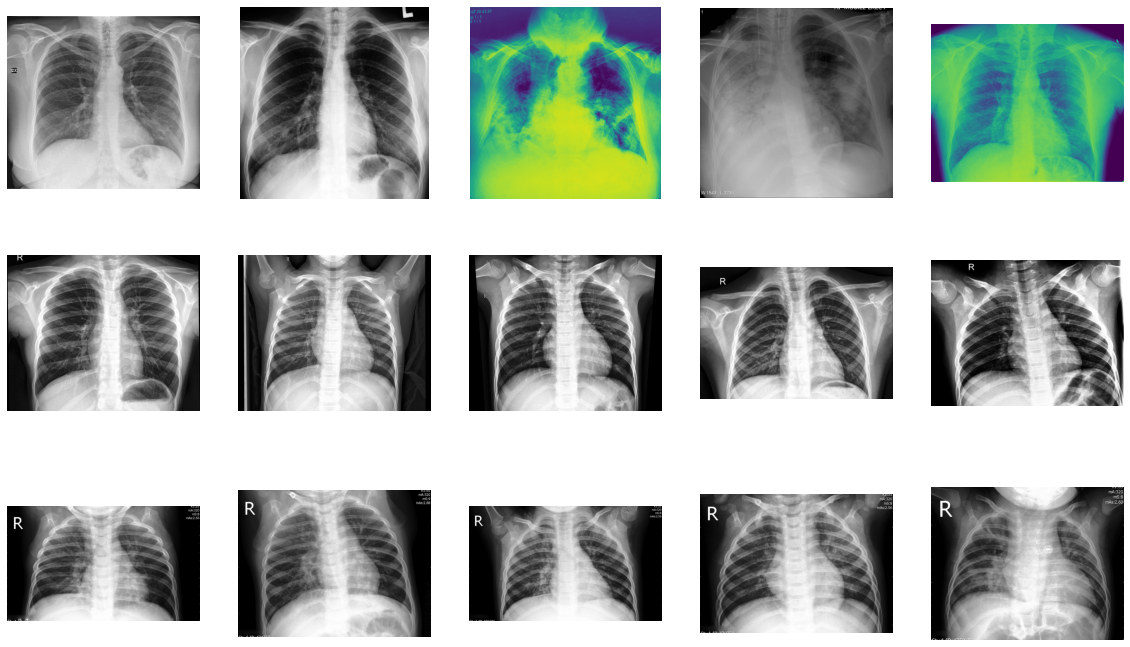

In [7]:
%matplotlib inline
files_cov = os.listdir(folder_cov)
files_pne = os.listdir(folder_pne)
files_nor = os.listdir(folder_nor)

nrows = 3
ncols = 5

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 5

foto_beberapa_cov = [os.path.join(folder_cov, fname)
                         for fname in files_cov[pic_index-5:pic_index]]
foto_beberapa_pne = [os.path.join(folder_pne, fname)
                         for fname in files_pne[pic_index-5:pic_index]]
foto_beberapa_nor = [os.path.join(folder_nor, fname)
                         for fname in files_nor[pic_index-5:pic_index]]

for i, img_path in enumerate(foto_beberapa_cov+foto_beberapa_pne+foto_beberapa_nor):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Data Augmentation

In [8]:
train_dir = "/content/Covid19-dataset/train"
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    fill_mode='nearest')

validation_dir = "/content/Covid19-dataset/test"
validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
  directory=train_dir,   
  target_size=(150,150), 
  class_mode='categorical',  
  shuffle=True,
  batch_size=64)

validation_generator = validation_datagen.flow_from_directory(
  directory=validation_dir,  
  target_size=(150,150),  
  class_mode='categorical',
  shuffle=True,
  batch_size=64)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


# Build Architecture

In [10]:
model = tf.keras.models.Sequential([                             
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

# Implementation Callbacks

In [11]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,
    patience=5, 
    min_lr=1.5e-5
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

# Loss, Optimizer and Metrics

In [12]:
model.compile(loss ='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

# Train Model

In [13]:
history=model.fit(
    train_generator,
    epochs=30,
    batch_size=64,
    verbose=2,
    callbacks = [reduce_lr, early_stop],
    validation_data=validation_generator
)

Epoch 1/30
4/4 - 30s - loss: 3.1716 - accuracy: 0.4462 - val_loss: 1.0867 - val_accuracy: 0.3939 - lr: 0.0010 - 30s/epoch - 7s/step
Epoch 2/30
4/4 - 12s - loss: 1.0635 - accuracy: 0.4422 - val_loss: 1.0540 - val_accuracy: 0.4091 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 3/30
4/4 - 12s - loss: 0.9964 - accuracy: 0.4701 - val_loss: 0.9586 - val_accuracy: 0.5152 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 4/30
4/4 - 12s - loss: 0.8913 - accuracy: 0.5817 - val_loss: 0.7532 - val_accuracy: 0.6061 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 5/30
4/4 - 13s - loss: 0.7231 - accuracy: 0.6853 - val_loss: 0.6334 - val_accuracy: 0.6061 - lr: 0.0010 - 13s/epoch - 3s/step
Epoch 6/30
4/4 - 12s - loss: 0.7475 - accuracy: 0.6693 - val_loss: 0.6188 - val_accuracy: 0.6818 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 7/30
4/4 - 12s - loss: 0.7272 - accuracy: 0.7371 - val_loss: 0.6103 - val_accuracy: 0.7273 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 8/30
4/4 - 12s - loss: 0.6935 - accuracy: 0.6813 - val_loss: 0.6328 - 

# Plot Accuracy and Loss to Evaluation

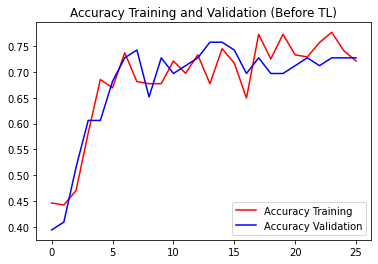

<Figure size 432x288 with 0 Axes>

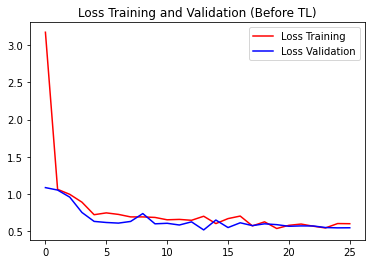

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot Before Transfer Learning

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Accuracy Training')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation (Before TL)')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validation')
plt.title('Loss Training and Validation (Before TL)')
plt.legend(loc=0)
plt.figure()
plt.show()

# Implementation Transfer Learning (TL)

In [15]:
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])
model.layers[0].trainable = False

model.summary()

234561536/234545216 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               26214912  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                     

# Loss, Optimizer and Metrics

In [16]:
model.compile(loss ='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

# Train Model

In [41]:
history=model.fit(
    train_generator,
    epochs=15,
    batch_size=64,
    verbose=2,
    callbacks = [reduce_lr, early_stop],
    validation_data=validation_generator)

Epoch 1/15
4/4 - 14s - loss: 0.1548 - accuracy: 0.9482 - val_loss: 0.4419 - val_accuracy: 0.9242 - lr: 4.0000e-05 - 14s/epoch - 4s/step
Epoch 2/15
4/4 - 12s - loss: 0.1395 - accuracy: 0.9641 - val_loss: 0.4331 - val_accuracy: 0.9242 - lr: 4.0000e-05 - 12s/epoch - 3s/step
Epoch 3/15
4/4 - 12s - loss: 0.1633 - accuracy: 0.9482 - val_loss: 0.4358 - val_accuracy: 0.9242 - lr: 4.0000e-05 - 12s/epoch - 3s/step
Epoch 4/15
4/4 - 12s - loss: 0.2741 - accuracy: 0.9402 - val_loss: 0.4734 - val_accuracy: 0.8939 - lr: 4.0000e-05 - 12s/epoch - 3s/step
Epoch 5/15
4/4 - 12s - loss: 0.1818 - accuracy: 0.9442 - val_loss: 0.4801 - val_accuracy: 0.8788 - lr: 4.0000e-05 - 12s/epoch - 3s/step
Epoch 6/15
4/4 - 12s - loss: 0.1763 - accuracy: 0.9522 - val_loss: 0.4894 - val_accuracy: 0.8788 - lr: 4.0000e-05 - 12s/epoch - 3s/step
Epoch 7/15
4/4 - 12s - loss: 0.0868 - accuracy: 0.9761 - val_loss: 0.5143 - val_accuracy: 0.8636 - lr: 4.0000e-05 - 12s/epoch - 3s/step
Epoch 8/15
4/4 - 12s - loss: 0.0912 - accuracy: 

# Plot Accuracy and Loss to Evaluation

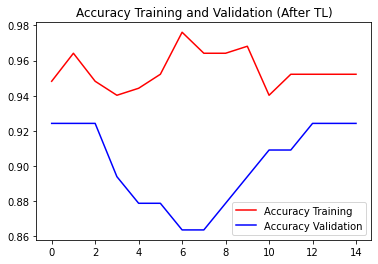

<Figure size 432x288 with 0 Axes>

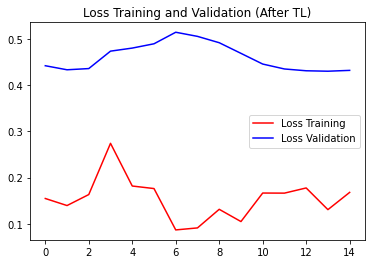

<Figure size 432x288 with 0 Axes>

In [43]:
# Plot After Transfer Learning

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Accuracy Training')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation (After TL)')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validation')
plt.title('Loss Training and Validation (After TL)')
plt.legend(loc=0)
plt.figure()
plt.show()

# Predict Image


### 1. Create Predict Function

In [44]:
def predict_image(image_upload, model = model):
  imge = image_upload
  imge_array = np.asarray(imge)
  imge_array = imge_array*(1/225)
  imge_input = tf.reshape(imge_array, shape = [1, 150, 150, 3])

  predict_array = model.predict(imge_input)[0]
  predict_kelas = np.argmax(model.predict(imge_input))

  if predict_kelas == 0:
      predict_item = 'Covid-19'
  elif predict_kelas == 1:
      predict_item = 'Normal'
  elif predict_kelas == 2:
      predict_item = 'Viral Pneumonia'
  else:
      predict_item = 'Not Covid-19, Normal, and Viral Pneumonia'

  return predict_item

In [45]:
def predict():
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img = np.vstack([x])

  kelas = predict_image(img)

  print('\n')
  plt.show()
  print('The model detected images as ' + kelas)

### 2. Try Predict
- Use new images and get in [Research Gate](https://www.researchgate.net/figure/Sample-chext-X-ray-images-of-Normal-Viral-Pneumonia-and-COVID-19-cases_fig4_342435547)

Saving label_covid_19.png to label_covid_19.png




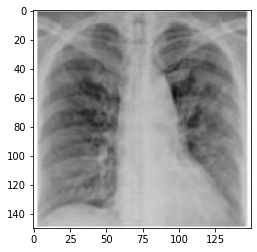

The model detected images as Covid-19


In [46]:
predict() #Label is Covid-19

Saving label_normal.png to label_normal.png




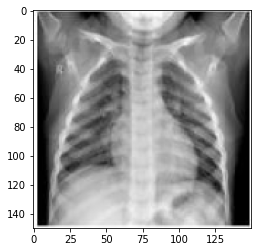

The model detected images as Normal


In [47]:
predict() #Label is Normal

Saving label_viral_pneumonia.png to label_viral_pneumonia.png




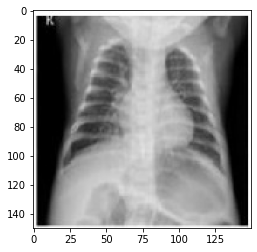

The model detected images as Viral Pneumonia


In [48]:
predict() #Label is Viral Pneumonia

# Conclusion
Proyek ini dibuat melalui berbagai tahapan mulai mempersiapkan dataset hingga mencoba memprediksi gambar. Selain itu, proyek ini menggunakan *Transfer Learning* untuk meningkatkan performa model *Machine Learning*, hal ini dapat dilihat dengan membandingkan plot performa sebelum dan sesudah *Transfer Learning*. Pada tahap terakhir kita juga mencoba memprediksi tiga gambar dari setiap kelas yang akan diprediksi. Secara keseluruhan model yang dihasilkan sudah baik, seperti pada hasil akhir akurasi latihan dan validasi yang masing-masing 95%+ dan 92%+ meskipun terdapat perbedaan akurasi latihan dan validasi. Jadi, melalui model ini dapat menjadi tambahan informasi selain pemeriksaan langsung di laboratorium sehingga dapat menambah efektivitas dan efisiensi pendeteksian penyakit pasien. Namun, tetap mesti dilakukan pemantauan berkala dan pengembangan lebih lanjut karena model tidak bisa benar 100%. 